# Model Training & Evaluation

This notebook demonstrates how to preprocess the data, train multiple machine learning models, evaluate their performance, and identify the best-performing model.

In [1]:

# Add project src to path
import sys, os
sys.path.append('../src')

from preprocess import DataPreprocessor
from train import ModelTrainer
from evaluate import ModelEvaluator

# Data preprocessing
preprocessor = DataPreprocessor()
data = preprocessor.preprocess_data('../data/student-por.csv')

# Train models
trainer = ModelTrainer()
trained_models = trainer.train_all_models(data['X_train'], data['y_train'])

# Evaluate models
evaluator = ModelEvaluator()
evaluator.evaluate_all_models(trained_models, data['X_test'], data['y_test'], data['target_encoder'])

# Comparison table
comparison_df = evaluator.create_comparison_table()
comparison_df


INFO:preprocess:Data loaded successfully. Shape: (649, 33)
INFO:preprocess:Target variable created. Distribution:
INFO:preprocess:Performance
Average      355
Good         148
Poor         100
Excellent     46
Name: count, dtype: int64
INFO:preprocess:Encoded 17 categorical features
INFO:preprocess:Features prepared. Shape: (649, 30)
INFO:preprocess:Feature columns: ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
INFO:preprocess:Features scaled successfully
INFO:preprocess:Data preprocessing completed successfully
INFO:preprocess:Train set shape: (519, 30)
INFO:preprocess:Test set shape: (130, 30)
INFO:train:Initialized 7 models
INFO:train:Training Logistic Regression...
INFO:train:Logistic Regression trained successfully
INFO:t

,Model,Accuracy,Precision,Recall,F1-Score
1,Decision Tree,0.507692,0.548849,0.507692,0.524831
5,XGBoost,0.530769,0.487562,0.530769,0.506493
0,Logistic Regression,0.538462,0.511256,0.538462,0.502230
2,Random Forest,0.561538,0.525282,0.561538,0.491739
4,K-Nearest Neighbors,0.523077,0.524422,0.523077,0.487536
3,SVM,0.546154,0.466291,0.546154,0.451308
6,Naive Bayes,0.215385,0.417205,0.215385,0.206882


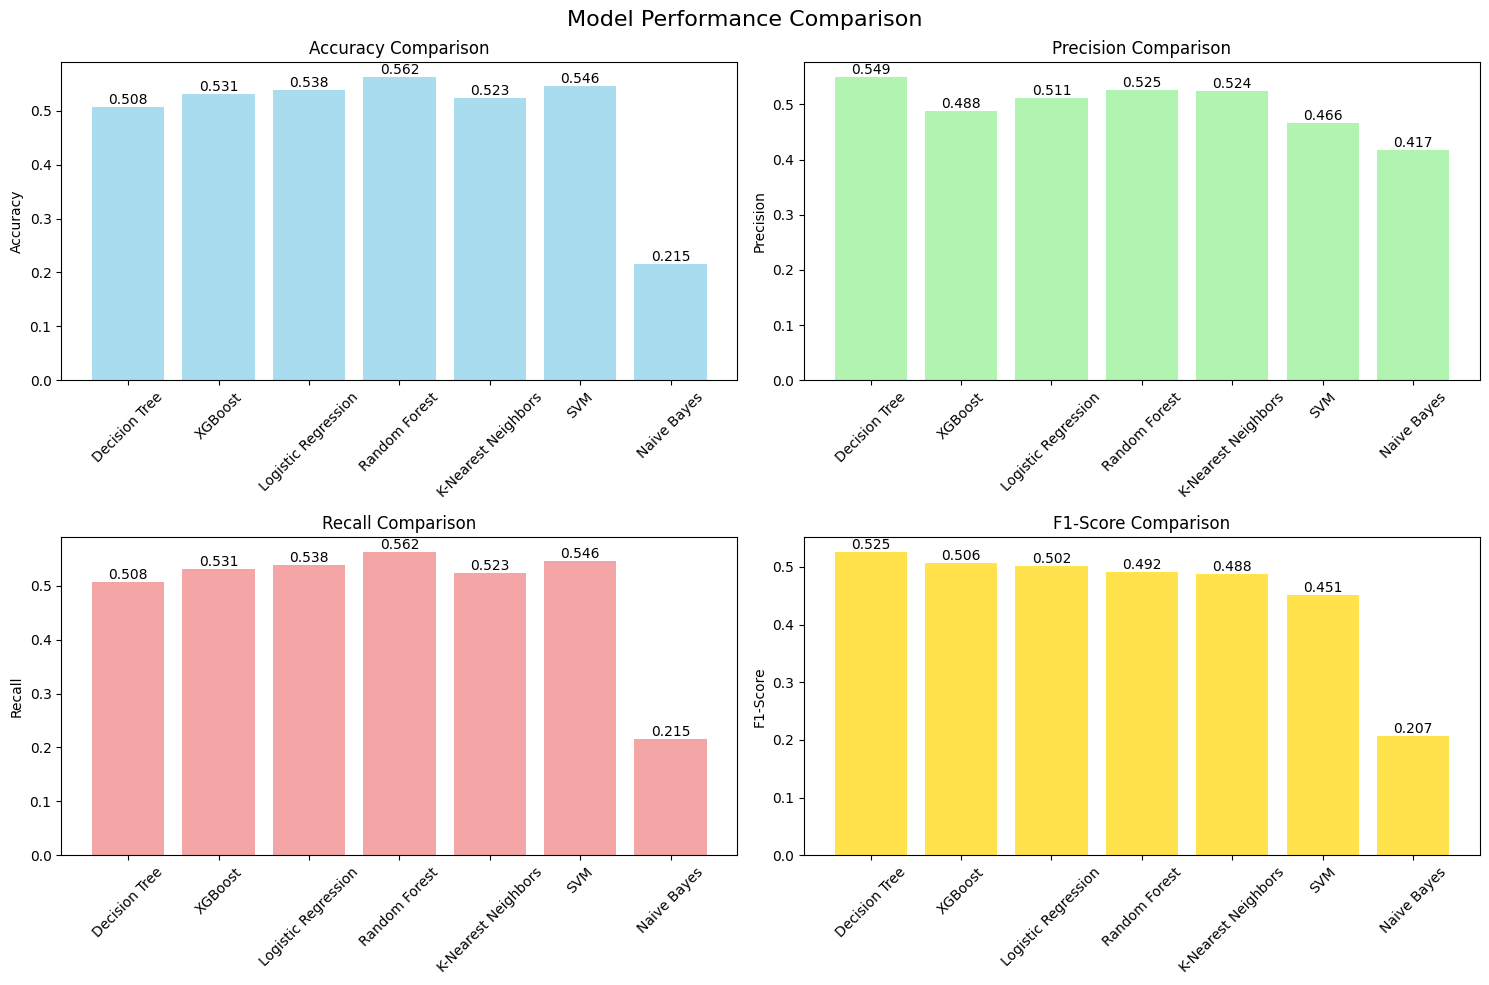

In [2]:

# Plot performance comparison
evaluator.plot_performance_comparison()


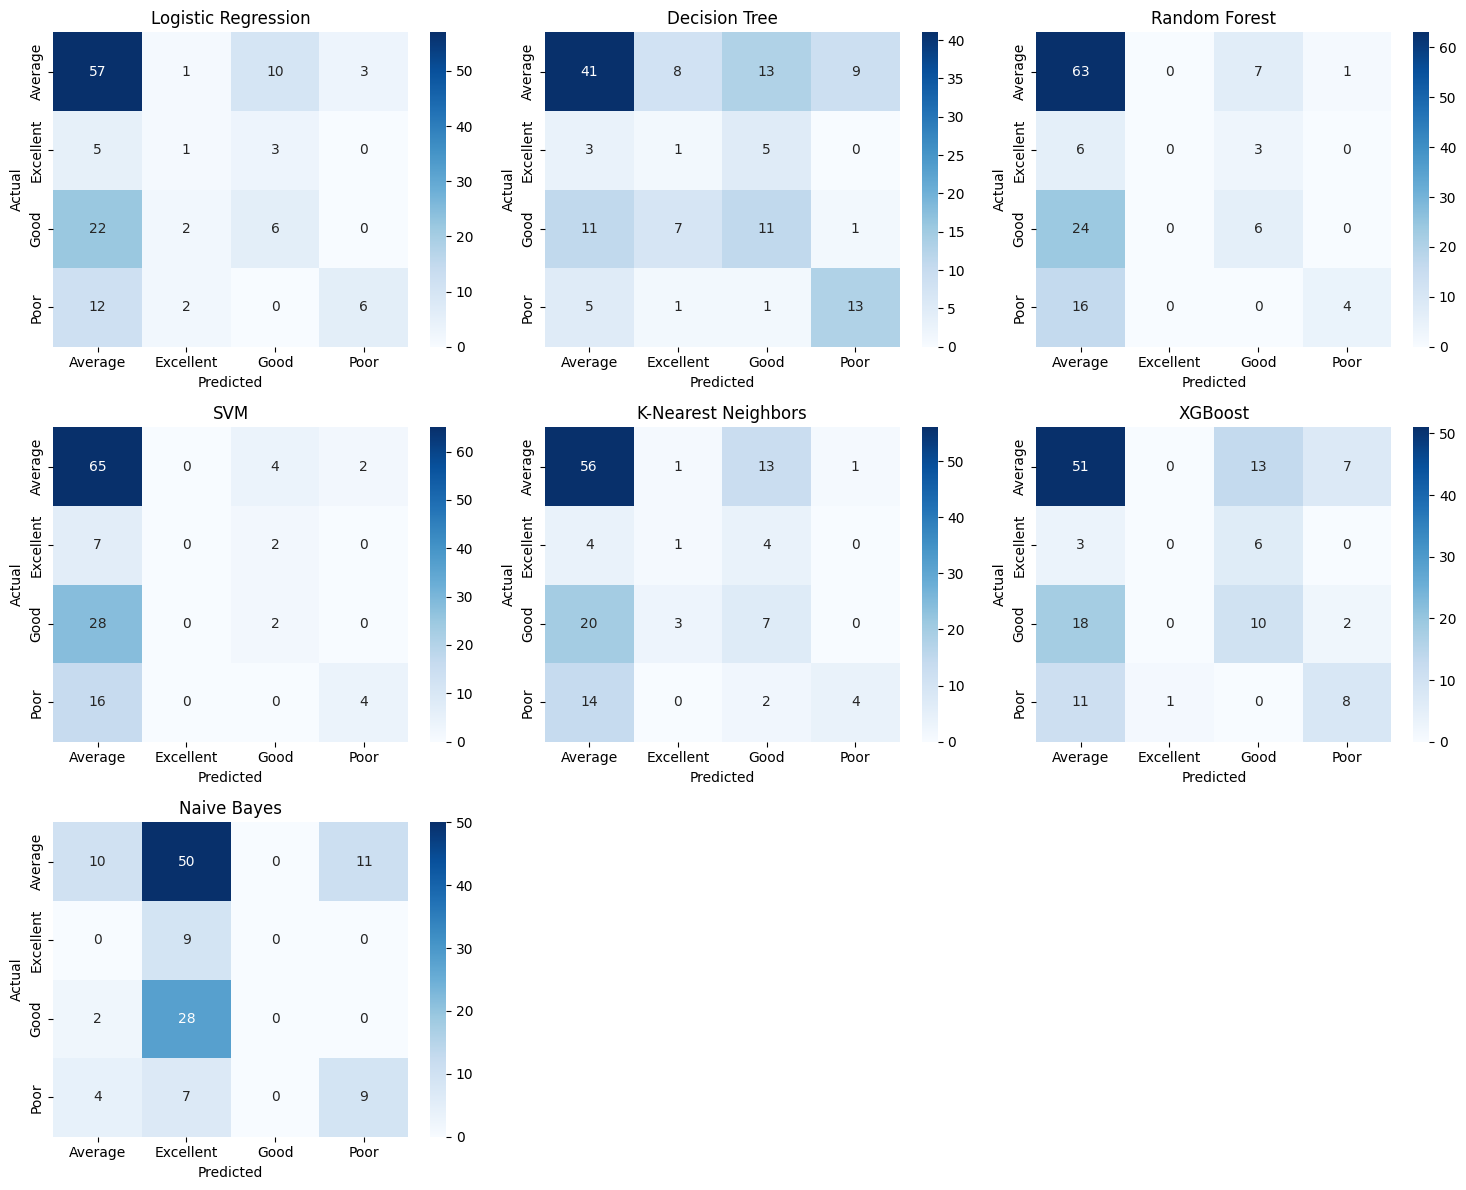

In [ ]:

# Plot confusion matrices
evaluator.plot_all_confusion_matrices(data['y_test'], data['target_encoder'])
